### Neural Networks


**Neural Networks** consists of : input layer, hidden layer(s), and output layer.

In each layer there sre a number of nodes.

Each layer is connected with the following one by connections (weights). The 
weights are the trainable parameters.
Another trainable parameter is the Bias, the bias is a node located on the previous layer of the affected layer. The weights from the bias to the nodes are one by default.

When two layers are *densely* connected, that means that each node from the first layer is connected with every node from the second layer.

**Activation Function**

Examples of activation functions:
1. Relu (Rectified Linear Unit).
2. Tanh (Hyperbolic Tangent). It transform the values to be in the range [-1,1], the more positive the value is the closet to one it is. 
3. Sigmoid. It squishes the values between zero and one.

At each of the neuorons, there will be an activattion function to be applied on its output. 



**Loss/Cost Function**

Loss function calculates how far away is the model's output from the expected output.

Example of loss functions:
1. Mean Absolute error.
2. Mean Squared error.
3. Hinge Loss.

The loss function determines if the model is getting better or worth after changing the weights and biases. Then we need to determine how to move to get beeter results, here we use Gradient Descent.


**Gradient Descent**

We want to get the least possible loss of the network. The algorithm tell us in which direction we should update the biases and weights in order to get the global minimum of the loss function. Then we apply the back propogation to go back and change those values.

**Optimizer**

A function that implements the gradient descent and backpropagation algorithms.

Examples:
1. Gradient Descent.
2. Stochastic Gradient Descent.
3. Mini-batch Gradient Descent.
4. Momentum.
5. Nesterov Accelerated Gradient.

## Creating a Neural Model

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#### Dataset
Fashion MNIST dataset contain 60,000 images for training and 10,000 images for validating/testing.

We have are 10 different classes.


In [4]:
fashion_minst = keras.datasets.fashion_mnist 
(train_images,train_labels),(test_images,test_labels)= fashion_minst.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images[0,23,23] # one pixel has a value between 0(black) and 255(white), the images are in gray scale

194

In [8]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

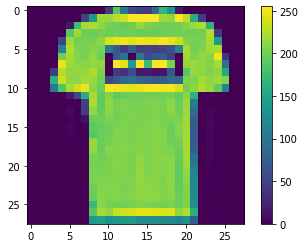

In [12]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.show() # an example of image (T-Shirt)

#### Data Preprocessing

In [13]:
# squishing all the values between 0 and 1. 
# That's only because by default the model starts with weights between 0 and 1
# And this way will be easier to guess the better weights
train_images=train_images/255.0 
test_images=test_images/255.0

#### Building the model

In [16]:
model = keras.Sequential ([
     keras.layers.Flatten(input_shape=(28,28)),    # input layer : takes the 28*28 matrix and flaten it
     keras.layers.Dense(128, activation='relu'),   # hidden layer
     keras.layers.Dense(10, activation='softmax'), # output layer : 10 neurons because we have 10 classes
    ])

#### Compiling the model

In [20]:
# choose the optimizer, loss function and metrices
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Training the model

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4974 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3747 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3149 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2560 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2479 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

#### Evaluating the model

In [22]:
test_loss, test_acc= model.evaluate(test_images, test_labels, verbose=1) # verbose: how much we are seeing on the screen
print('Test Accuracy ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3316 - accuracy: 0.8858
Test Accuracy  0.8858000040054321


The model seems to be overfitted ). The test accuracy is lower than the training accuracy. We need to tune the parameters. 

Tuning parameters is applied on hyper parameters: number of epochs, optimizer function, number of neurons in hidden layers, ... .

In [23]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2323 - accuracy: 0.9133


In [24]:
test_loss, test_acc= model.evaluate(test_images, test_labels, verbose=1) # verbose: how much we are seeing on the screen
print('Test Accuracy ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3417 - accuracy: 0.8806
Test Accuracy  0.8805999755859375


#### Predections

In [31]:
predictions=model.predict(test_images[:5]) # first 5 images
print (class_names[np.argmax(predictions[0])]) #  argmax returns the index of the max value in a list

Ankle boot


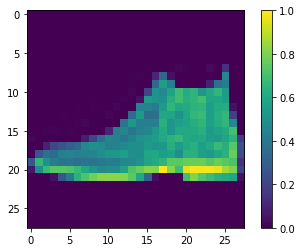

In [32]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show() # an example of image (T-Shirt)